In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data=load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
labels = pd.Series(data['target'])

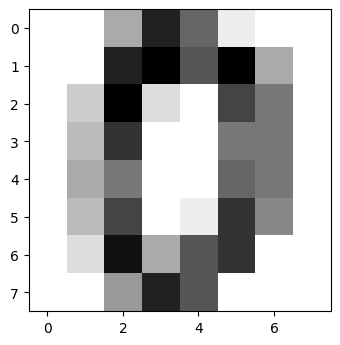

In [5]:
%matplotlib inline 

data_df=pd.DataFrame(data['data'])

first_image = data_df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

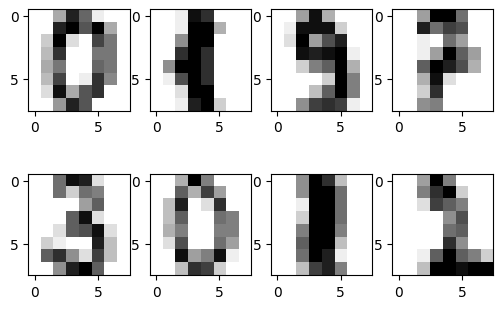

In [6]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data_df.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data_df.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data_df.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data_df.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data_df.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data_df.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data_df.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data_df.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


def train(train_features,train_target,i):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_features,train_target)
    return knn

def test(test_features,test_target,model):
    predictions=model.predict(test_features)
    accuracy=accuracy_score(test_target,predictions)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(np.round(accuracy,2))
    return np.mean(fold_accuracies)   
        
        
list=[1,5,10,15,20]

results=[]
for i in list:
    results.append(cross_validate(i))
            

results

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect s

[0.9675, 0.96, 0.9525, 0.9525, 0.95]

In [8]:
from sklearn.neural_network import MLPClassifier

def train(train_features,train_target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,))
    mlp.fit(train_features,train_target)
    return mlp

def test(test_features,test_target,model):
    predictions=model.predict(test_features)
    accuracy=sum(predictions==test_target)/len(test_target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
neurons=[8,16,32,64,128,256]
results=[]
for row in neurons:
    result=cross_validate(row)
    results.append(result)    
    print('N° Neurons: ',row,result)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env

N° Neurons:  8 0.86


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_

N° Neurons:  16 0.92


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_

N° Neurons:  32 0.93
N° Neurons:  64 0.93


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons:  128 0.94


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons:  256 0.95


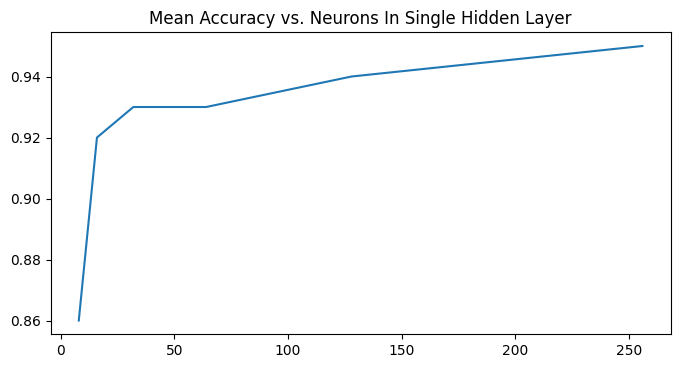

In [10]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

plt.plot(neurons, results)

In [11]:
def train(train_features,train_target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,))
    mlp.fit(train_features,train_target)
    return mlp

def test(train_features,train_target,model):
    predictions=model.predict(train_features)
    accuracy=sum(predictions==train_target)/len(train_target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
neurons=[8,16,32,64,128,256]
train_results=[]
for row in neurons:
    result_train=cross_validate(row)
    train_results.append(result_train)    
    print('N° Neurons:',row,': ',result_train)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env

N° Neurons: 8 :  0.94


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_

N° Neurons: 16 :  1.0


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons: 32 :  1.0
N° Neurons: 64 :  1.0


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons: 128 :  1.0


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons: 256 :  1.0


(0.84, 1.01)

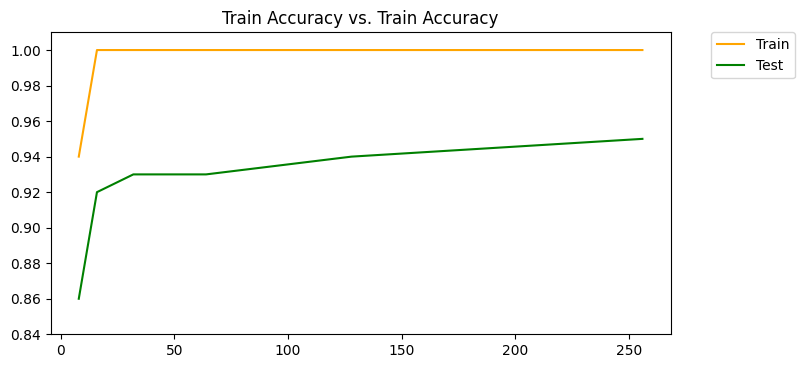

In [12]:
plt.figure(figsize=(8,4))
plt.title("Train Accuracy vs. Train Accuracy")
plt.plot(neurons, train_results,label='Train',color='orange')
plt.plot(neurons, results,label='Test',color='green')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
plt.ylim([0.84,1.01])

In [13]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  


neurons=[64,128,256]
test_predictions_two_layers=[]
for row in neurons:
    test_prediction=cross_validate(row)
    test_predictions_two_layers.append(test_prediction)
    print('N° Neurons',row,': ',test_prediction)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 64 :  0.94


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 128 :  0.95


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 256 :  0.96


In [14]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)  
        
train_prediction=cross_validate(64)
print('Two Hidden Layer Accuracy: ',train_prediction)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Two Hidden Layer Accuracy:  1.0


In [15]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(test_features,test_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)

neurons=[10,64,128,256]
three_layer=[]

for row in neurons:
    test_predictions=cross_validate(row)
    three_layer.append(test_predictions)
    print('N° Neurons',row,': ',test_predictions)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env

N° Neurons 10 :  0.9
N° Neurons 64 :  0.95


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 128 :  0.96


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 256 :  0.96


In [16]:
def train(features,target,i):
    mlp=MLPClassifier(hidden_layer_sizes=(i,i,i))
    mlp.fit(features,target)
    return mlp

def test(features,target,model):
    predictions=model.predict(features)
    accuracy=sum(predictions==target)/len(target)
    return accuracy

def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=6,random_state=2)
    for train_index,test_index in kf.split(data_df):
        train_features=data_df.iloc[train_index]
        test_features=data_df.iloc[test_index]
        train_target=labels.iloc[train_index]
        test_target=labels.iloc[test_index]
        model=train(train_features,train_target,k)
        accuracy=test(train_features,train_target,model)
        fold_accuracies.append(accuracy)
    return np.round(np.mean(fold_accuracies),2)

neurons=[10,64,128,256]
three_layer_train=[]

for row in neurons:
    train_predictions=cross_validate(row)
    three_layer_train.append(train_predictions)
    print('N° Neurons',row,': ',train_predictions)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env

N° Neurons 10 :  0.99
N° Neurons 64 :  1.0


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 128 :  1.0


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



N° Neurons 256 :  1.0


(0.84, 1.01)

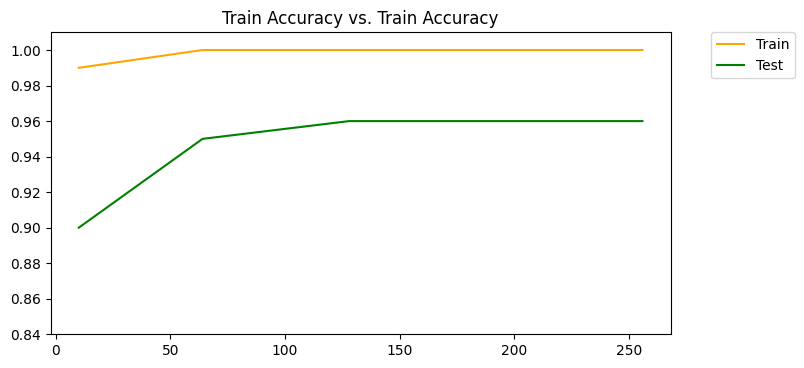

In [17]:
plt.figure(figsize=(8,4))
plt.title("Train Accuracy vs. Train Accuracy")
plt.plot(neurons, three_layer_train,label='Train',color='orange')
plt.plot(neurons, three_layer,label='Test',color='green')
plt.legend(bbox_to_anchor=(1.2,1), borderaxespad=0)
plt.ylim([0.84,1.01])